In [1]:
import intake
import xarray as xr
import matplotlib.pyplot as plt
import sys
import os
import xcdat
import numpy as np
sys.path.append(os.path.dirname('../workflow'))
import matplotlib as mpl
from workflow.scripts.utils import calculate_zonal_mean

In [2]:
col = intake.open_esm_datastore("../catalogues/merge_CMIP6.json")

In [4]:
col_2xdust = col.search(variable_id='cli', source_id=['NorESM2-LM', 'MPI-ESM-1-2-HAM'], experiment_id='piClim-2xdust', table_id='Amon') 
col_ctrl = col.search(variable_id='cli', source_id=['NorESM2-LM', 'MPI-ESM-1-2-HAM'], experiment_id='piClim-control', table_id='Amon') 

In [5]:
dsets_exp = col_2xdust.to_dataset_dict()
dsets_ctrl = col_ctrl.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id'


In [23]:
clivi_nor_exp = xr.open_dataset('../results/piClim-2xdust/clivi/clivi_piClim-2xdust_NorESM2-LM_Ayear.nc')
clivi_nor_ctrl = xr.open_dataset('../results/piClim-control/clivi/clivi_piClim-control_NorESM2-LM_Ayear.nc')
clivi_mpi_exp = xr.open_dataset('../results/piClim-2xdust/clivi/clivi_piClim-2xdust_MPI-ESM-1-2-HAM_Ayear.nc')
clivi_mpi_ctrl = xr.open_dataset('../results/piClim-control/clivi/clivi_piClim-control_MPI-ESM-1-2-HAM_Ayear.nc')


In [57]:
nor_ds = clivi_nor_ctrl.isel(time=slice(5, None)).mean(dim='time')
nor_ds_exp = clivi_nor_exp.isel(time=slice(2, None)).mean(dim='time')

nor_ds = nor_ds.cf.guess_coord_axis()
nor_ds_exp = nor_ds_exp.cf.guess_coord_axis()

nor_zom = nor_ds.spatial.average("clivi",axis=["X"])
nor_zom_exp = nor_ds_exp.spatial.average("clivi",axis=["X"])


mpi_ds = clivi_mpi_ctrl.isel(time=slice(2, None)).mean(dim='time')
mpi_exp = clivi_mpi_exp.isel(time=slice(2, None)).mean(dim='time')

mpi_ds = mpi_ds.cf.guess_coord_axis()
mpi_ds_exp = mpi_ds_exp.cf.guess_coord_axis()

mpi_zom = mpi_ds.spatial.average("clivi",axis=["X"])
mpi_zom_exp = mpi_ds_exp.spatial.average("clivi",axis=["X"])


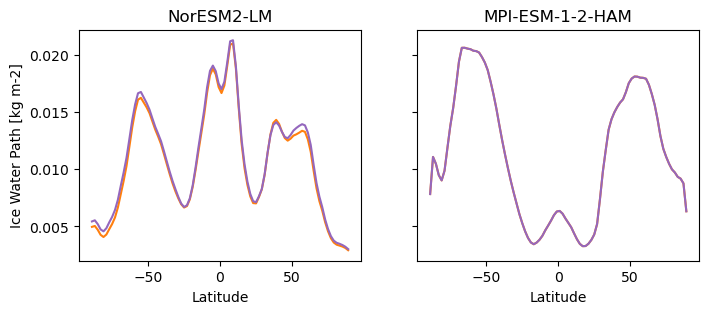

In [59]:
fig,(ax,ax1) = plt.subplots(figsize=(8,3), ncols=2, sharey=True)
nor_zom['clivi'].plot(ax=ax,color='tab:orange')
nor_zom_exp['clivi'].plot(ax=ax,color='tab:purple')

mpi_zom['clivi'].plot(ax=ax1,color='tab:orange', label='piClim-control')
mpi_zom_exp['clivi'].plot(ax=ax1,color='tab:purple', label='piClim-2xdust')

ax.set_ylabel('Ice Water Path [kg m-2]')
ax.set_title('NorESM2-LM')
ax1.set_title('MPI-ESM-1-2-HAM')
ax1.set_ylabel('')
ax1.set_xlabel('Latitude')
ax.set_xlabel('Latitude')
# ax.semilogy()
plt.savefig('../results/figs/AerChemMIP/mpi_noresm_dust_perturbation_ice.pdf', bbox_inches='tight')

In [74]:
cdnc_nor_exp = xr.open_dataset('../results/piClim-2xdust/derived_variables/cdncvi/cdncvi_NorESM2-LM_piClim-2xdust_Ayear.nc')
cdnc_nor_ctrl = xr.open_dataset('../results/piClim-control/derived_variables/cdncvi/cdncvi_NorESM2-LM_piClim-control_Ayear.nc')

cdnc_mpi_exp = xr.open_dataset('../results/piClim-2xdust/derived_variables/cdncvi/cdncvi_MPI-ESM-1-2-HAM_piClim-2xdust_Ayear.nc')
cdnc_mpi_ctrl = xr.open_dataset('../results/piClim-control/derived_variables/cdncvi/cdncvi_MPI-ESM-1-2-HAM_piClim-control_Ayear.nc')

In [75]:
nor_ds = cdnc_nor_ctrl.isel(time=slice(5, None)).mean(dim='time')
nor_ds_exp = cdnc_nor_exp.isel(time=slice(2, None)).mean(dim='time')

nor_ds = nor_ds.cf.add_bounds(['lon','lat'])
nor_ds_exp = nor_ds_exp.cf.add_bounds(['lon','lat'])

nor_ds = nor_ds.cf.guess_coord_axis()
nor_ds_exp = nor_ds_exp.cf.guess_coord_axis()

nor_zom = nor_ds.spatial.average("cdncvi",axis=["X"])
nor_zom_exp = nor_ds_exp.spatial.average("cdncvi",axis=["X"])


mpi_ds = cdnc_mpi_ctrl.isel(time=slice(2, None)).mean(dim='time')
mpi_exp = cdnc_mpi_exp.isel(time=slice(2, None)).mean(dim='time')

mpi_ds = mpi_ds.cf.add_bounds(['lon','lat'])
mpi_ds_exp = mpi_exp.cf.add_bounds(['lon','lat'])

mpi_ds = mpi_ds.cf.guess_coord_axis()
mpi_ds_exp = mpi_ds_exp.cf.guess_coord_axis()

mpi_zom = mpi_ds.spatial.average("cdncvi",axis=["X"])
mpi_zom_exp = mpi_ds_exp.spatial.average("cdncvi",axis=["X"])

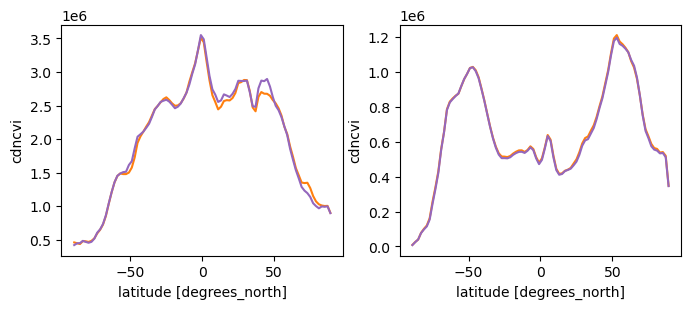

In [77]:
fig,(ax,ax1) = plt.subplots(figsize=(8,3), ncols=2)
nor_zom['cdncvi'].plot(ax=ax,color='tab:orange')
nor_zom_exp['cdncvi'].plot(ax=ax,color='tab:purple')


mpi_zom['cdncvi'].plot(ax=ax1,color='tab:orange', label='piClim-control')
mpi_zom_exp['cdncvi'].plot(ax=ax1,color='tab:purple', label='piClim-2xdust')
